In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cnn-news18-headlines-with-descriptions/cnn_news18_headlines.csv


## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

## Loading dataset

In [3]:
df = pd.read_csv('/kaggle/input/cnn-news18-headlines-with-descriptions/cnn_news18_headlines.csv',index_col= 0)

In [4]:
df.head()

,date,headline,description
0,"July 29, 2023, 16:11 IST",First Six Months of 2023 Most Peaceful in J&K ...,According to the South Asia Terrorism Portal (...
1,"July 29, 2023, 15:46 IST",Buffer Zones Between Kuki-Meitei Camps Offer P...,In an effort to understand the steps taken by ...
2,"July 29, 2023, 00:26 IST",Pakistan Making Another Bid to Revive Separati...,Sources said Pakistan's Inter-Services Intelli...
3,"July 28, 2023, 17:52 IST",Udupi Video Case: BJP Worker Arrested for Dero...,"Speaking about the Udupi video case, the BJP w..."
4,"July 28, 2023, 17:17 IST","UCC May Not Touch Tribal Practices, Live-in Ti...",With the deadline for responding to Law Commis...


## Data Formatting

In [5]:
df.dtypes

date           object
headline       object
description    object
dtype: object

**Dealing with date column**

In [6]:
df['date'].head()

0    July 29, 2023, 16:11 IST
1    July 29, 2023, 15:46 IST
2    July 29, 2023, 00:26 IST
3    July 28, 2023, 17:52 IST
4    July 28, 2023, 17:17 IST
Name: date, dtype: object

In [7]:
replace_lookup = [('July','7'),('June','6'),('May','5'),(',',""),('IST',"")]

In [8]:
for i,j in replace_lookup:
    df['date'] = df['date'].str.replace(i,j)

In [9]:
df['date'] = df['date'].str.strip()

In [10]:
df['date'] = pd.to_datetime(df['date'],format= '%m %d %Y %H:%M')

## Analyzing data

In [11]:
start_datetime = df['date'].min()
end_datetime = df['date'].max()
print('start_datetime is ',start_datetime)
print('end_datetime is ',end_datetime)

start_datetime is  2023-05-31 10:20:00
end_datetime is  2023-07-29 16:11:00


**Preparing stopwords for Word Cloud**

In [12]:
stopwords = list(STOPWORDS)

In [13]:
stopwords2000 = ["able", "about", "above", "across", "actually", "add", "added", "adding", "additional", "after", "again", "against", "ago", "ahead", "ain't", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "an", "and", "another", "any", "anybody", "anyhow", "anyone", "anything", "anyway", "anyways", "anywhere", "apart", "appear", "appreciate", "appropriate", "aren't", "around", "as", "aside", "ask", "asking", "associated", "at", "available", "away", "awfully", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "big", "both", "brief", "but", "by", "came", "can", "cannot", "can't", "cause", "causes", "certain", "certainly", "changes", "clearly", "c'mon", "co", "com", "come", "comes", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn't", "course", "currently", "definitely", "described", "despite", "did", "didn't", "different", "do", "does", "doesn't", "doing", "don't", "done", "down", "downwards", "during", "each", "edu", "eg", "eight", "either", "else", "elsewhere", "entirely", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "far", "few", "fifth", "first", "five", "followed", "following", "follows", "for", "former", "formerly", "forth", "four", "from", "further", "furthermore", "get", "gets", "getting", "given", "gives", "go", "goes", "going", "gone", "got", "gotten", "greetings", "had", "hadn't", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "here's", "hereupon", "hers", "herself", "he's", "hi", "him", "himself", "his", "hither", "hopefully", "how", "howbeit", "however", "i'd", "ie", "if", "ignored", "i'll", "i'm", "immediate", "in", "inasmuch", "inc", "indeed", "indicate", "indicated", "indicates", "indicate", "indicating", "inner", "insofar", "instead", "into", "inward", "is", "isn't", "it", "it'd", "it'll", "its", "itself", "i've", "just", "keep", "keeps", "kept", "know", "known", "knows", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "let's", "like", "liked", "likely", "likewise", "little", "look", "looking", "looks", "low", "lower", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "meanwhile", "merely", "might", "million", "miss", "missed", "misses", "missing", "modified", "moi", "more", "moreover", "most", "mostly", "mr", "mrs", "ms", "much", "must", "mustn't", "my", "myself", "namely", "nd", "near", "nearly", "necessary", "need", "needed", "needing", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "no", "nobody", "non", "none", "nonetheless", "noone", "no-one", "nor", "normally", "not", "nothing", "novel", "now", "nowhere", "o'clock", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "on", "once", "one", "one's", "only", "onto", "opposite", "or", "other", "others", "otherwise", "ought", "oughtn't", "our", "ours", "ourselves", "out", "outside", "over", "overall", "own", "p", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "possible", "presumably", "probably", "provided", "provides", "put", "q", "que", "quite", "qv", "r", "rather", "rd", "re", "really", "reasonably", "recent", "recently", "regarding", "regardless", "regards", "relatively", "respectively", "right", "round", "s", "said", "same", "saw", "say", "saying", "says", "second", "secondly", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "shall", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "since", "six", "so", "some", "somebody", "someday", "somehow", "someone", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specified", "specify", "specifying", "still", "sub", "such", "sup", "sure", "", "t", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "there'd", "therefore", "therein", "there'll", "there're", "theres", "there's", "thereupon", "there've", "these", "they", "they'd", "they'll", "they're", "they've", "thing", "things", "think", "third", "thirty", "this", "thorough", "thoroughly", "those", "though", "three", "through", "throughout", "thru", "thus", "till", "to", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "t's", "twice", "two", "u", "un", "under", "underneath", "undoing", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "us", "use", "used", "useful", "uses", "using", "usually", "uucp", "v", "value", "various", "versus", "very", "via", "viz", "vs", "w", "want", "wants", "was", "wasn't", "way", "we", "we'd", "welcome", "well", "we'll", "went", "were", "we're", "weren't", "we've", "what", "whatever", "what'll", "what's", "what've", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "where's", "whereupon", "wherever", "whether", "which", "whichever", "while", "whilst", "whither", "who", "who'd", "whoever", "whole", "who'll", "whom", "whomever", "who's", "whose", "why", "will", "willing", "wish", "with", "within", "without", "wonder", "won't", "would", "wouldn't", "x", "y", "yes", "yet", "you", "you'd", "you'll", "your", "you're", "yours", "yourself", "yourselves", "you've", "z", "zero"
]

**contextual_stopwords is prepared after making wordcloud and observing unuseful words for this case.**

In [14]:
contextual_stopwords = ['CNN','NEWS18','NEWS','18','month','day','area','number','due','sources','According','alleged','live','year','July','June','issue','top','based','including','expected','party','state','group','told','years','accused','leader','country','district','meeting','case','people','high','close','killed']

In [15]:
stopwords_bulk = stopwords + stopwords2000+contextual_stopwords

In [16]:
stopwords_bulk_set = set(stopwords_bulk)

**Combing all description data**

In [17]:
description_data = " ".join(df['description'])

**Plotting WordCloud**

In [18]:
wordcloud = WordCloud(width=800,height=400,background_color='white',min_font_size=10,stopwords=stopwords_bulk_set).generate(description_data)


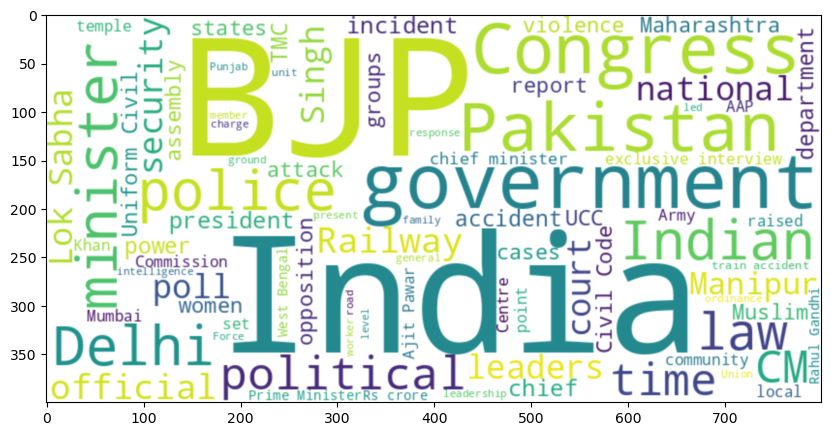

In [19]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bicubic')
# plt.title('Word Cloud of Top 10 Tracks on Spotify India')
plt.show()